In [1]:
!rm -rf model/
!rm model.zip
!rm keras.h5

rm: cannot remove 'model.zip': No such file or directory
rm: cannot remove 'keras.h5': No such file or directory


#Initialize

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

from sklearn import __version__ as sk_version
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Reading and Normalizing Train Dataset


In [2]:
df_train = pd.read_csv("/content/Static gesture train.csv")
df_train.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')

In [3]:
df_train.head()

,index,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,label
0,0,299.468358,165.700351,307.221066,156.427451,286.280538,157.338695,324.557804,163.005888,272.788098,169.601209,349.699709,232.251673,262.563668,238.649076,373.167183,330.463750,237.214419,345.258265,314.773931,331.959139,324.757369,327.627913,348.513591,457.552441,282.914710,454.484379,324.236292,580.934641,278.711459,583.191410,319.990872,573.846053,284.797960,577.749097,f
1,1,299.308030,165.631052,307.154686,157.127951,285.745148,157.468348,324.128431,163.603682,272.284349,169.710263,353.988325,239.887109,263.388997,242.967045,379.598290,330.901616,237.598588,349.212749,314.090420,337.644550,318.646080,331.921363,349.553845,458.701089,282.866059,457.523143,320.542229,584.867561,273.381613,584.101696,316.507576,571.999737,277.781867,571.697600,f
2,2,297.196786,168.017039,306.036135,158.758533,285.467064,159.953332,324.423588,164.805635,274.172926,170.913285,353.042146,245.198063,264.254625,242.684823,378.875538,328.585451,242.831926,346.195097,311.696020,335.100796,315.129556,339.882475,352.057000,457.609641,283.239909,457.237767,339.260032,588.572680,275.727714,584.920336,313.327440,573.062293,277.995118,574.828567,f
3,3,299.845117,169.483981,308.752365,158.886658,287.406239,159.921882,325.425583,166.837261,275.025598,172.508068,356.769736,247.425987,264.124958,245.113876,383.315314,332.887299,242.958115,347.835381,352.373014,326.461983,328.441828,332.459655,349.373712,456.127598,284.144977,454.395028,319.120151,582.931471,274.727216,582.687380,316.608183,575.850183,279.445803,576.650291,f
4,4,301.889476,170.646783,310.652246,160.886264,289.602829,161.366766,325.819976,169.050989,276.265628,172.607431,356.664997,245.186747,265.018925,244.338936,382.636604,332.257772,243.014741,348.672899,346.478254,327.166940,326.455237,334.800897,351.350967,456.549276,283.033554,458.412500,339.037579,588.073842,271.271595,584.280080,317.637396,573.524371,275.883592,574.951316,f


In [4]:
df_train.shape

(2125, 36)

In [5]:
# (x6,y6) and (x7,y7) corresponds to shoulder keypoints
# shoulderDistanceVec is (x6-x7, y6-y7) 

shoulderDistanceVec = pd.DataFrame(abs(np.subtract(df_train[['x6', 'y6']],df_train[['x7', 'y7']])))
shoulderDistanceVec.head()

,x6,y6
0,87.136041,6.397403
1,90.599328,3.079936
2,88.787521,2.513239
3,92.644779,2.312110
4,91.646073,0.847812


In [6]:
x = shoulderDistanceVec.x6.values
y = shoulderDistanceVec.y6.values
shoulderDistance = pd.DataFrame(np.sqrt(np.square(x) + np.square(y)))
shoulderDistance.head()

,0
0,87.370570
1,90.651665
2,88.823084
3,92.673625
4,91.649994


In [7]:
# points = all the coodrinates present in the dataset
points = [['x1', 'y1'], ['x2', 'y2'], ['x3', 'y3'], ['x4', 'y4'], ['x5', 'y5'], ['x6', 'y6'],
       ['x7', 'y7'], ['x8', 'y8'], ['x9', 'y9'], ['x10', 'y10'], ['x11', 'y11'], ['x12', 'y12'], 
       ['x13', 'y13'], ['x14', 'y14'], ['x15', 'y15'], ['x16', 'y16'], ['x17', 'y17']]

# (x1, y1) is the nose keypoint. For every keypoints, subtract nose keypoint then divide with shoulder distance 
for p in reversed(points):
  df_train[p] = np.divide(np.subtract(df_train[p], df_train[['x1', 'y1']]), shoulderDistance)

In [8]:
df_train.head(5)

,index,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,label
0,0,0.0,0.0,0.088734,-0.106133,-0.150941,-0.095703,0.287161,-0.030839,-0.305369,0.044647,0.574923,0.761713,-0.422393,0.834935,0.843520,1.885800,-0.712528,2.055130,0.175180,1.902915,0.289445,1.853342,0.561347,3.340394,-0.189465,3.305278,0.283481,4.752565,-0.237573,4.778395,0.234890,4.671432,-0.167910,4.716105,f
1,1,0.0,0.0,0.086558,-0.093800,-0.149615,-0.090045,0.273800,-0.022364,-0.298105,0.044999,0.603191,0.819136,-0.396231,0.853112,0.885701,1.823139,-0.680731,2.025133,0.163068,1.897522,0.213323,1.834388,0.554273,3.232925,-0.181375,3.219931,0.234239,4.624697,-0.286000,4.616249,0.189732,4.482749,-0.237460,4.479416,f
2,2,0.0,0.0,0.099516,-0.104235,-0.132057,-0.090784,0.306528,-0.036155,-0.259210,0.032607,0.628726,0.868930,-0.370874,0.840635,0.919567,1.807733,-0.612058,2.005988,0.163237,1.881085,0.201893,1.934919,0.617635,3.260330,-0.157131,3.256144,0.473562,4.734756,-0.241706,4.693637,0.181604,4.560135,-0.216179,4.580020,f
3,3,0.0,0.0,0.096114,-0.114351,-0.134222,-0.103180,0.276027,-0.028560,-0.267816,0.032632,0.614248,0.841038,-0.385440,0.816089,0.900690,1.763213,-0.613842,1.924511,0.566805,1.693880,0.308574,1.758598,0.534441,3.093044,-0.169413,3.074349,0.207988,4.461329,-0.271036,4.458695,0.180883,4.384917,-0.220120,4.393551,f
4,4,0.0,0.0,0.095611,-0.106498,-0.134061,-0.101255,0.261107,-0.017412,-0.279584,0.021393,0.597660,0.813311,-0.402297,0.804061,0.881038,1.763350,-0.642387,1.942456,0.486512,1.707803,0.268039,1.791098,0.539678,3.119504,-0.205738,3.139833,0.405326,4.554578,-0.334074,4.513184,0.171827,4.395828,-0.283752,4.411397,f


In [9]:
df_train.shape

(2125, 36)

#Reading and Normalizing Test Dataset

In [10]:
df_test = pd.read_csv("/content/Static gesture test.csv")

In [11]:
df_test.shape

(655, 35)

In [12]:
df_test.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,label
0,385.464510,108.698761,395.736983,96.796849,371.004236,96.534779,413.602478,107.249514,352.679552,108.590445,451.912077,195.172379,329.678922,205.569989,480.808030,318.979705,303.519003,326.425734,484.309466,430.912934,285.985617,442.831480,430.607122,430.531492,351.621901,427.977732,388.675297,589.940520,375.188627,587.916260,392.092594,571.743728,405.389348,573.277958,n
1,396.801557,113.083168,406.296336,99.683245,384.310316,100.408700,425.178156,107.115630,364.810855,112.915730,465.287327,195.657698,348.951091,204.029483,504.455259,305.981641,322.906255,319.381999,500.012680,410.048785,303.149479,436.761332,444.267521,413.917020,366.547602,426.840748,422.315841,584.846431,406.088466,579.878326,430.643331,577.910612,436.418831,578.834772,n
2,404.802196,114.809551,417.385849,100.761703,390.914132,102.098653,435.288703,111.538419,373.322534,114.202551,473.307537,196.149586,356.370313,206.018619,508.985788,313.723744,331.866158,317.510251,511.164268,428.673588,320.582674,425.547625,448.901541,430.925285,372.622284,429.213232,425.028216,580.727879,415.814896,580.787950,396.718561,578.079573,449.147624,575.622612,n
3,410.012453,116.752080,422.885280,105.401841,397.330389,106.013025,441.769869,112.734301,381.505083,117.264844,481.402663,196.080725,363.808631,205.564260,512.173723,317.162605,338.684303,320.935315,511.122464,417.016216,328.381324,435.737898,440.648091,413.582245,384.480189,414.246351,407.582358,575.911934,414.305021,575.838861,403.603348,570.843411,443.643464,574.568952,n
4,419.703964,118.339136,429.481832,105.740176,404.481033,105.171168,447.061325,112.689568,387.486108,119.190158,486.526348,199.311038,365.423975,208.800569,518.030245,316.755751,341.909325,322.281092,511.812176,417.574713,336.986723,427.626788,432.640954,423.936314,389.452848,422.839312,404.388300,577.049242,415.306507,576.427750,404.124298,570.487865,445.687865,573.464135,n


In [13]:
shoulderDistanceVec = pd.DataFrame(abs(np.subtract(df_test[['x6', 'y6']],df_test[['x7', 'y7']])))
shoulderDistanceVec.head()

,x6,y6
0,122.233155,10.397610
1,116.336236,8.371785
2,116.937224,9.869032
3,117.594032,9.483535
4,121.102373,9.489531


In [14]:
x = shoulderDistanceVec.x6.values
y = shoulderDistanceVec.y6.values
shoulderDistance = pd.DataFrame(np.sqrt(np.square(x) + np.square(y)))
shoulderDistance.head()

,0
0,122.674588
1,116.637072
2,117.352939
3,117.975818
4,121.473602


In [15]:
points = [['x1', 'y1'], ['x2', 'y2'], ['x3', 'y3'], ['x4', 'y4'], ['x5', 'y5'], ['x6', 'y6'],
       ['x7', 'y7'], ['x8', 'y8'], ['x9', 'y9'], ['x10', 'y10'], ['x11', 'y11'], ['x12', 'y12'], 
       ['x13', 'y13'], ['x14', 'y14'], ['x15', 'y15'], ['x16', 'y16'], ['x17', 'y17']]

for p in reversed(points):
  df_test[p] = np.divide(np.subtract(df_test[p], df_test[['x1', 'y1']]), shoulderDistance)

In [18]:
df_test.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,label
0,0.0,0.0,0.083738,-0.097020,-0.117875,-0.099156,0.229371,-0.011814,-0.267251,-0.000883,0.541657,0.704902,-0.454744,0.789660,0.777207,1.714136,-0.667991,1.774834,0.805749,2.626576,-0.810917,2.723732,0.367987,2.623467,-0.275873,2.602650,n
1,0.0,0.0,0.081404,-0.114886,-0.107095,-0.108666,0.243290,-0.051163,-0.274276,-0.001436,0.587170,0.707961,-0.410251,0.779738,0.922980,1.653835,-0.633549,1.768724,0.884891,2.546065,-0.802936,2.775088,0.406954,2.579230,-0.259385,2.690033,n
2,0.0,0.0,0.107229,-0.119706,-0.118344,-0.108313,0.259785,-0.027874,-0.268248,-0.005172,0.583755,0.693123,-0.412703,0.777220,0.887780,1.695008,-0.621510,1.727274,0.906343,2.674531,-0.717660,2.647893,0.375784,2.693718,-0.274215,2.679129,n
3,0.0,0.0,0.109114,-0.096208,-0.107497,-0.091028,0.269186,-0.034056,-0.241637,0.004346,0.605126,0.672414,-0.391638,0.752800,0.865951,1.698742,-0.604600,1.730721,0.857040,2.545133,-0.691931,2.703824,0.259677,2.516025,-0.216419,2.521655,n
4,0.0,0.0,0.080494,-0.103718,-0.125319,-0.108402,0.225212,-0.046509,-0.265225,0.007006,0.550098,0.666580,-0.446846,0.744700,0.809446,1.633413,-0.640424,1.678899,0.758257,2.463379,-0.680948,2.546131,0.106500,2.515750,-0.249034,2.506719,n


#Create dataset (X_train, y_train, X_test, y_test)

In [19]:
# For static gestures, we dropped left & right ankle, knee keypoints. We also dropped the nose keypoint (x1, y1), since after the normalization, 
# it becomes the origin and is always 0

X_train = df_train[['x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6',
       'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12',
       'y12', 'x13', 'y13']]
y_train = df_train.label 
y_train = pd.DataFrame(y_train)

X_test = df_test[['x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6',
       'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12',
       'y12', 'x13', 'y13']]
y_test = df_test.label 
y_test = pd.DataFrame(y_test)

In [20]:
print(X_test.shape, y_test.shape)

(655, 24) (655, 1)


In [21]:
print(X_train.shape, y_train.shape)

(2125, 24) (2125, 1)


#Encode the labels

In [22]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [23]:
print(X_train.shape, y_train.shape)

(2125, 24) (2125, 3)


In [24]:
print(X_test.shape, y_test.shape)

(655, 24) (655, 3)


#SIMPLE NEURAL NETWORK MODEL

In [25]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=24, input_shape=[X_train.shape[1]]))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    # validation_split=0.1,
    validation_data = (X_test, y_test),
    shuffle=True,
)

Epoch 1/10
67/67 [==============================] - 4s 9ms/step - loss: 1.0884 - acc: 0.5466 - val_loss: 0.4410 - val_acc: 0.9786
Epoch 2/10
67/67 [==============================] - 0s 3ms/step - loss: 0.4964 - acc: 0.8472 - val_loss: 0.2350 - val_acc: 0.9924
Epoch 3/10
67/67 [==============================] - 0s 3ms/step - loss: 0.2958 - acc: 0.9550 - val_loss: 0.1373 - val_acc: 0.9969
Epoch 4/10
67/67 [==============================] - 0s 3ms/step - loss: 0.2072 - acc: 0.9688 - val_loss: 0.0929 - val_acc: 0.9969
Epoch 5/10
67/67 [==============================] - 0s 3ms/step - loss: 0.1423 - acc: 0.9807 - val_loss: 0.0636 - val_acc: 0.9969
Epoch 6/10
67/67 [==============================] - 0s 3ms/step - loss: 0.1130 - acc: 0.9787 - val_loss: 0.0512 - val_acc: 0.9969
Epoch 7/10
67/67 [==============================] - 0s 3ms/step - loss: 0.0860 - acc: 0.9870 - val_loss: 0.0399 - val_acc: 0.9985
Epoch 8/10
67/67 [==============================] - 0s 3ms/step - loss: 0.0666 - acc: 0.99

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                600       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                800       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 1,499
Trainable params: 1,499
Non-trainable params: 0
_________________________________________________________________


#RESULTS 

In [27]:
y_pred = model.predict(X_test)

model.evaluate(X_test, y_test)

21/21 [==============================] - 0s 2ms/step - loss: 0.0217 - acc: 0.9985


[0.021663442254066467, 0.9984732866287231]

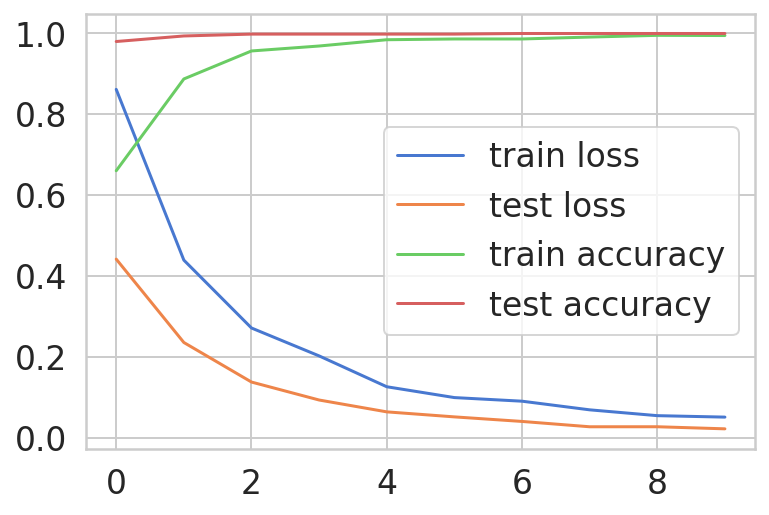

In [28]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')

plt.plot(history.history['acc'], label='train accuracy')
plt.plot(history.history['val_acc'], label='test accuracy')

plt.legend();

In [29]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(16, 14)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(220, 20, n=7),
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)
  b, t = plt.ylim()
  b += 0.5 
  t -= 0.5 
  plt.ylim(b, t)
  plt.show()

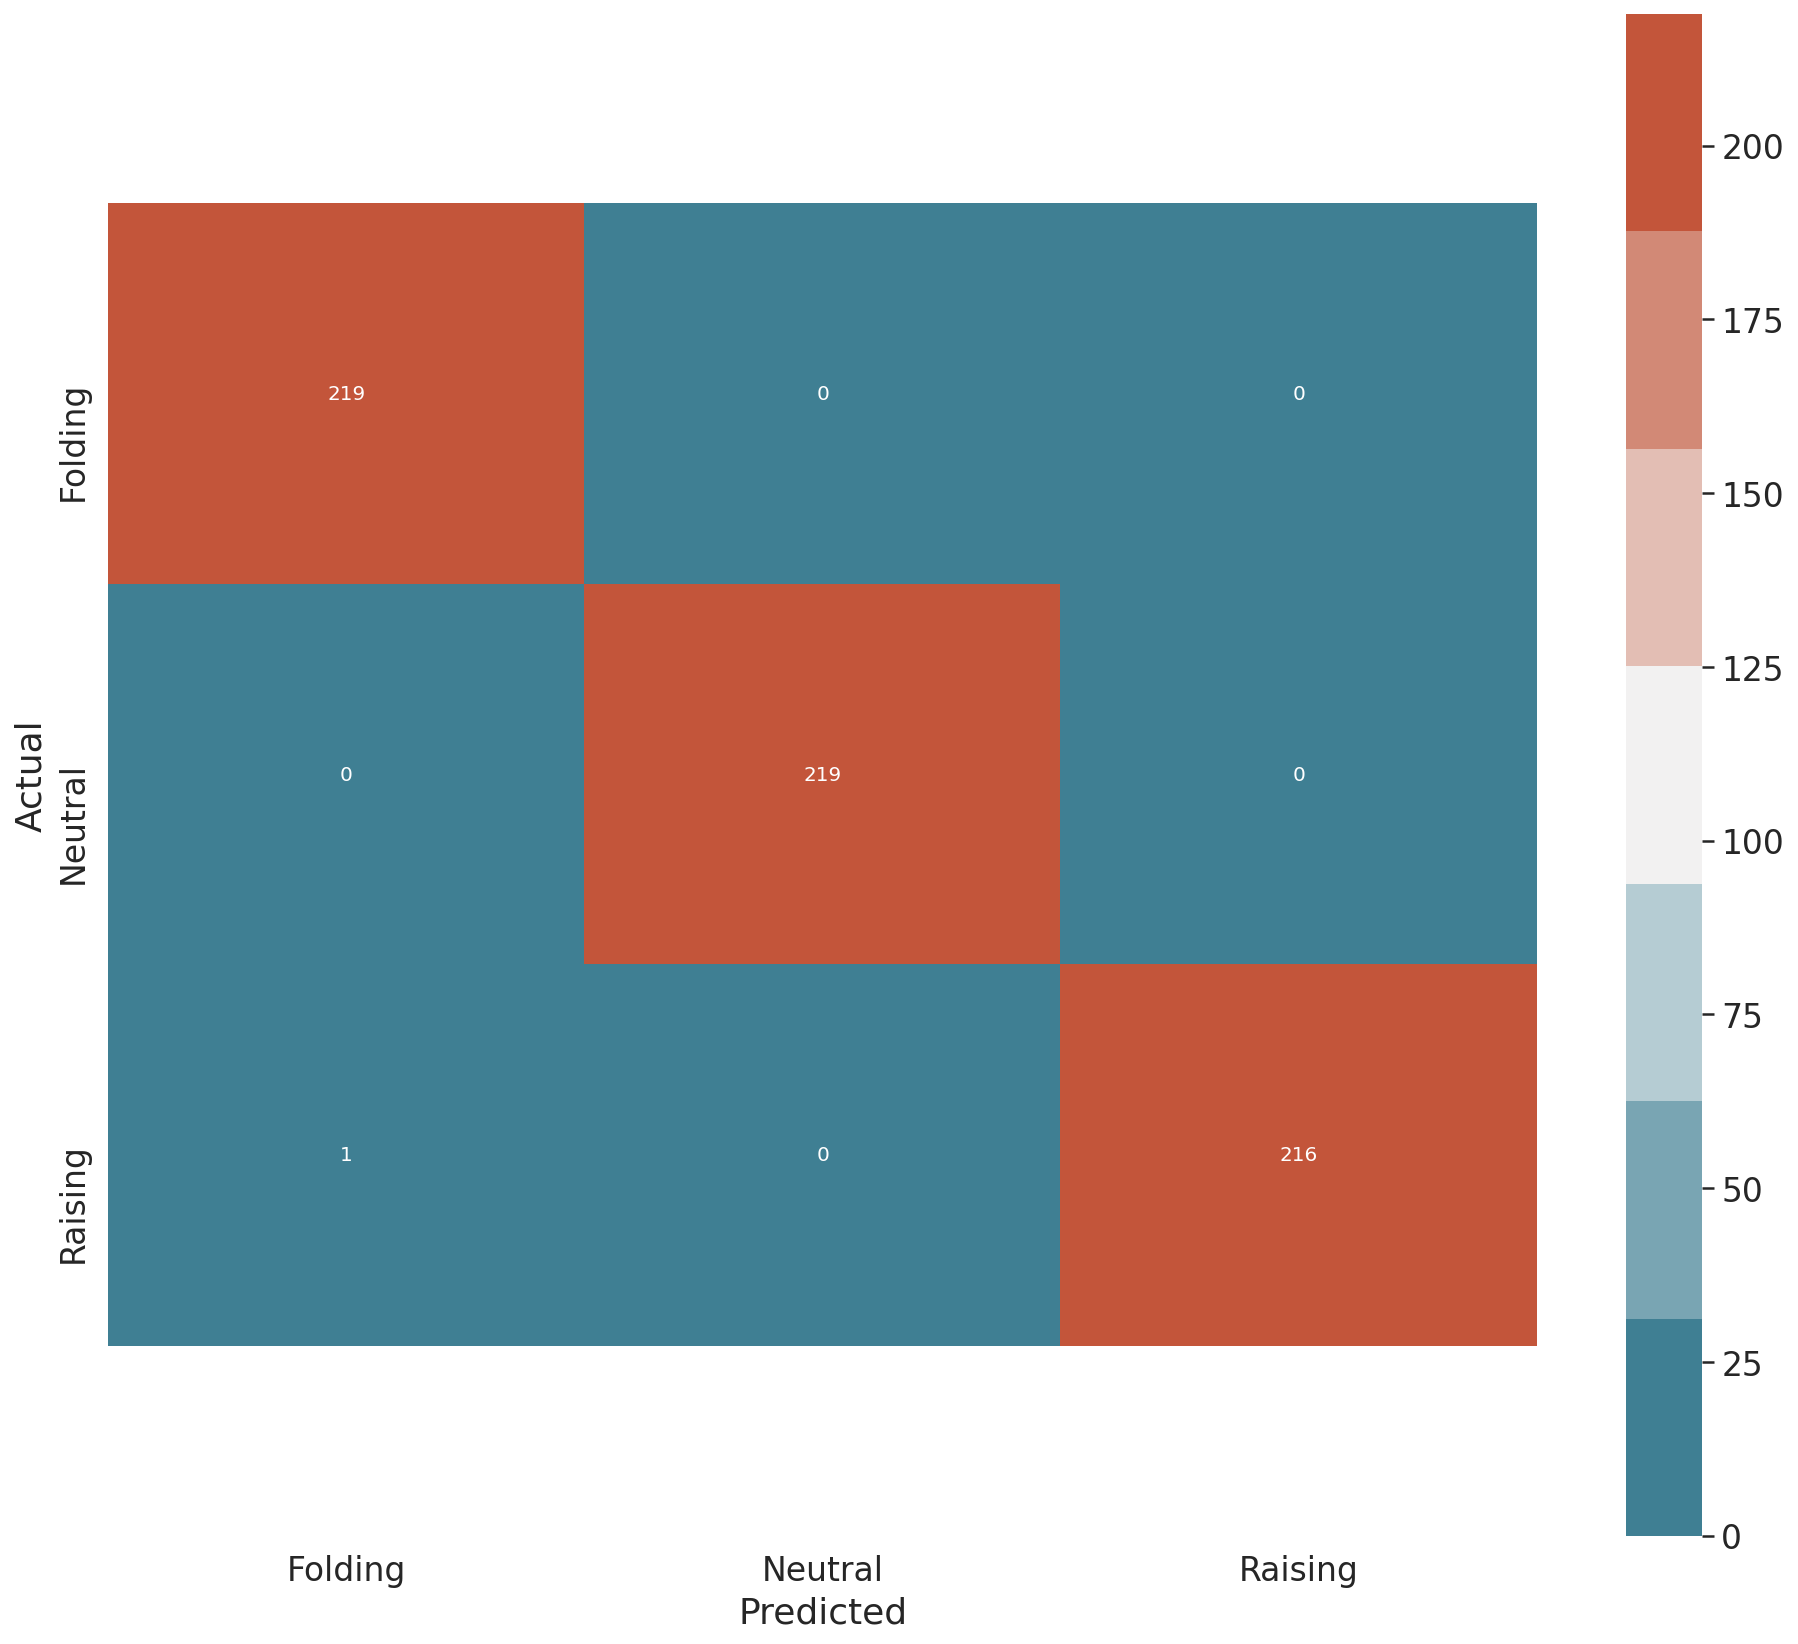

In [30]:
plot_cm(
  enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred),
  # enc.categories_[0]
  ["Folding", "Neutral", "Raising"]
)

In [31]:
# Evaluation metric in terms of precision, recall and f-score
print(classification_report(enc.inverse_transform(y_test), enc.inverse_transform(y_pred)))

              precision    recall  f1-score   support

           f       1.00      1.00      1.00       219
           n       1.00      1.00      1.00       219
           r       1.00      1.00      1.00       217

    accuracy                           1.00       655
   macro avg       1.00      1.00      1.00       655
weighted avg       1.00      1.00      1.00       655



#SAVING THE MODEL

In [36]:
# Remove the older files if present and store the latest model trained
!rm keras.h5
model.save('keras.h5')

rm: cannot remove 'keras.h5': No such file or directory


#CONVERTING TO TFJS

In [ ]:
!pip install tensorflowjs

In [ ]:
!rm -rf model/
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

2021-03-14 04:08:57.776579: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [ ]:
!cp "/content/keras.h5" "/content/model/"

In [ ]:
!rm model.zip
!zip -r model.zip model

rm: cannot remove 'model.zip': No such file or directory
  adding: model/ (stored 0%)
  adding: model/keras.h5 (deflated 60%)
  adding: model/model.json (deflated 74%)
  adding: model/group1-shard1of1.bin (deflated 7%)


# Download the model

In [ ]:
# The zip file contains the original .h5 keras model along with the model required for Tensorflow-JS

from google.colab import files
files.download('model.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>